# Feature preprocessing, CatBoost and Model Interpretability 

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, precision_score, recall_score, mean_squared_error, r2_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree
from sklearn.model_selection import cross_val_score, cross_validate
import imblearn
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_text, plot_tree
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.feature_selection import VarianceThreshold
from lime.lime_tabular import LimeTabularExplainer
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import shap

In [2]:
# to show all columns
pd.set_option('display.max_columns', None) # to revert: pd.reset_option('display.max_columns')

In [3]:
df = pd.read_csv("data/Train.csv", index_col=0)
df.head()

District      Block  CultLand  CropCultLand  \
ID                                                            
ID_GTFAC7PEVWQ9  Nalanda  Noorsarai        45            40   
ID_TK40ARLSPOKS  Nalanda     Rajgir        26            26   
ID_1FJY2CRIMLZZ     Gaya      Gurua        10            10   
ID_I3IPXS4DB7NE     Gaya      Gurua        15            15   
ID_4T8YQWXWHB4A  Nalanda  Noorsarai        60            60   

                                             LandPreparationMethod  \
ID                                                                   
ID_GTFAC7PEVWQ9               TractorPlough FourWheelTracRotavator   
ID_TK40ARLSPOKS  WetTillagePuddling TractorPlough FourWheelTrac...   
ID_1FJY2CRIMLZZ               TractorPlough FourWheelTracRotavator   
ID_I3IPXS4DB7NE               TractorPlough FourWheelTracRotavator   
ID_4T8YQWXWHB4A                   TractorPlough WetTillagePuddling   

                CropTillageDate  CropTillageDepth         CropEstMethod  \
ID                                                                        
ID_GTFAC7PEVWQ9      2022-07-20                 5  Manual_PuddledRandom   
ID_TK40ARLSPOKS      2022-07-18                 5  Manual_PuddledRandom   
ID_1FJY2CRIMLZZ      2022-06-30                 6  Manual_PuddledRandom   
ID_I3IPXS4DB7NE      2022-06-16                 6  Manual_PuddledRandom   
ID_4T8YQWXWHB4A      2022-07-19                 4  Manual_PuddledRandom   

                RcNursEstDate SeedingSowingTransplanting  SeedlingsPerPit  \
ID                                                                          
ID_GTFAC7PEVWQ9    2022-06-27                 2022-07-21              2.0   
ID_TK40ARLSPOKS    2022-06-20                 2022-07-20              2.0   
ID_1FJY2CRIMLZZ    2022-06-20                 2022-08-13              2.0   
ID_I3IPXS4DB7NE    2022-06-17                 2022-07-17              2.0   
ID_4T8YQWXWHB4A    2022-06-21                 2022-07-20              2.0   

                                                     NursDetFactor  \
ID                                                                   
ID_GTFAC7PEVWQ9  CalendarDate IrrigWaterAvailability SeedAvaila...   
ID_TK40ARLSPOKS  CalendarDate PreMonsoonShowers IrrigWaterAvail...   
ID_1FJY2CRIMLZZ  PreMonsoonShowers IrrigWaterAvailability Labou...   
ID_I3IPXS4DB7NE  CalendarDate PreMonsoonShowers IrrigWaterAvail...   
ID_4T8YQWXWHB4A  CalendarDate IrrigWaterAvailability SeedAvaila...   

                                                    TransDetFactor  \
ID                                                                   
ID_GTFAC7PEVWQ9  CalendarDate SeedlingAge RainArrival IrrigWate...   
ID_TK40ARLSPOKS  CalendarDate SeedlingAge RainArrival IrrigWate...   
ID_1FJY2CRIMLZZ  SeedlingAge IrrigWaterAvailability LaborAvaila...   
ID_I3IPXS4DB7NE  CalendarDate SeedlingAge RainArrival IrrigWate...   
ID_4T8YQWXWHB4A  SeedlingAge RainArrival IrrigWaterAvailability...   

                 TransplantingIrrigationHours TransplantingIrrigationSource  \
ID                                                                            
ID_GTFAC7PEVWQ9                           5.0                        Boring   
ID_TK40ARLSPOKS                           5.0                        Boring   
ID_1FJY2CRIMLZZ                           4.0                        Boring   
ID_I3IPXS4DB7NE                           NaN                           NaN   
ID_4T8YQWXWHB4A                           9.0                        Boring   

                TransplantingIrrigationPowerSource  TransIrriCost  \
ID                                                                  
ID_GTFAC7PEVWQ9                           Electric          200.0   
ID_TK40ARLSPOKS                           Electric          125.0   
ID_1FJY2CRIMLZZ                           Electric           80.0   
ID_I3IPXS4DB7NE                                NaN            NaN   
ID_4T8YQWXWHB4A                           Electric          300.0  

#### Let's calculate the yield per acre as a better measure of crop yield.

In [4]:
df['yield_per_acre'] = df['Yield'] / df['Acre'] 
df.head()

District      Block  CultLand  CropCultLand  \
ID                                                            
ID_GTFAC7PEVWQ9  Nalanda  Noorsarai        45            40   
ID_TK40ARLSPOKS  Nalanda     Rajgir        26            26   
ID_1FJY2CRIMLZZ     Gaya      Gurua        10            10   
ID_I3IPXS4DB7NE     Gaya      Gurua        15            15   
ID_4T8YQWXWHB4A  Nalanda  Noorsarai        60            60   

                                             LandPreparationMethod  \
ID                                                                   
ID_GTFAC7PEVWQ9               TractorPlough FourWheelTracRotavator   
ID_TK40ARLSPOKS  WetTillagePuddling TractorPlough FourWheelTrac...   
ID_1FJY2CRIMLZZ               TractorPlough FourWheelTracRotavator   
ID_I3IPXS4DB7NE               TractorPlough FourWheelTracRotavator   
ID_4T8YQWXWHB4A                   TractorPlough WetTillagePuddling   

                CropTillageDate  CropTillageDepth         CropEstMethod  \
ID                                                                        
ID_GTFAC7PEVWQ9      2022-07-20                 5  Manual_PuddledRandom   
ID_TK40ARLSPOKS      2022-07-18                 5  Manual_PuddledRandom   
ID_1FJY2CRIMLZZ      2022-06-30                 6  Manual_PuddledRandom   
ID_I3IPXS4DB7NE      2022-06-16                 6  Manual_PuddledRandom   
ID_4T8YQWXWHB4A      2022-07-19                 4  Manual_PuddledRandom   

                RcNursEstDate SeedingSowingTransplanting  SeedlingsPerPit  \
ID                                                                          
ID_GTFAC7PEVWQ9    2022-06-27                 2022-07-21              2.0   
ID_TK40ARLSPOKS    2022-06-20                 2022-07-20              2.0   
ID_1FJY2CRIMLZZ    2022-06-20                 2022-08-13              2.0   
ID_I3IPXS4DB7NE    2022-06-17                 2022-07-17              2.0   
ID_4T8YQWXWHB4A    2022-06-21                 2022-07-20              2.0   

                                                     NursDetFactor  \
ID                                                                   
ID_GTFAC7PEVWQ9  CalendarDate IrrigWaterAvailability SeedAvaila...   
ID_TK40ARLSPOKS  CalendarDate PreMonsoonShowers IrrigWaterAvail...   
ID_1FJY2CRIMLZZ  PreMonsoonShowers IrrigWaterAvailability Labou...   
ID_I3IPXS4DB7NE  CalendarDate PreMonsoonShowers IrrigWaterAvail...   
ID_4T8YQWXWHB4A  CalendarDate IrrigWaterAvailability SeedAvaila...   

                                                    TransDetFactor  \
ID                                                                   
ID_GTFAC7PEVWQ9  CalendarDate SeedlingAge RainArrival IrrigWate...   
ID_TK40ARLSPOKS  CalendarDate SeedlingAge RainArrival IrrigWate...   
ID_1FJY2CRIMLZZ  SeedlingAge IrrigWaterAvailability LaborAvaila...   
ID_I3IPXS4DB7NE  CalendarDate SeedlingAge RainArrival IrrigWate...   
ID_4T8YQWXWHB4A  SeedlingAge RainArrival IrrigWaterAvailability...   

                 TransplantingIrrigationHours TransplantingIrrigationSource  \
ID                                                                            
ID_GTFAC7PEVWQ9                           5.0                        Boring   
ID_TK40ARLSPOKS                           5.0                        Boring   
ID_1FJY2CRIMLZZ                           4.0                        Boring   
ID_I3IPXS4DB7NE                           NaN                           NaN   
ID_4T8YQWXWHB4A                           9.0                        Boring   

                TransplantingIrrigationPowerSource  TransIrriCost  \
ID                                                                  
ID_GTFAC7PEVWQ9                           Electric          200.0   
ID_TK40ARLSPOKS                           Electric          125.0   
ID_1FJY2CRIMLZZ                           Electric           80.0   
ID_I3IPXS4DB7NE                                NaN            NaN   
ID_4T8YQWXWHB4A                           Electric          300.0  

In [5]:
# Drop the index column 
df = df.reset_index(drop=True)

#### Let's remove outliers in "Yield" in the 99th percentile

In [6]:
# Calculate the 99th percentile threshold for 'yield_per_acre'
yield_per_acre_threshold = df['yield_per_acre'].quantile(0.99)

# Filter out rows where 'yield_per_acre' is above the 99th percentile
df_under99 = df[df['yield_per_acre'] <= yield_per_acre_threshold]
df_under99.head()

District      Block  CultLand  CropCultLand  \
0  Nalanda  Noorsarai        45            40   
1  Nalanda     Rajgir        26            26   
2     Gaya      Gurua        10            10   
3     Gaya      Gurua        15            15   
4  Nalanda  Noorsarai        60            60   

                               LandPreparationMethod CropTillageDate  \
0               TractorPlough FourWheelTracRotavator      2022-07-20   
1  WetTillagePuddling TractorPlough FourWheelTrac...      2022-07-18   
2               TractorPlough FourWheelTracRotavator      2022-06-30   
3               TractorPlough FourWheelTracRotavator      2022-06-16   
4                   TractorPlough WetTillagePuddling      2022-07-19   

   CropTillageDepth         CropEstMethod RcNursEstDate  \
0                 5  Manual_PuddledRandom    2022-06-27   
1                 5  Manual_PuddledRandom    2022-06-20   
2                 6  Manual_PuddledRandom    2022-06-20   
3                 6  Manual_PuddledRandom    2022-06-17   
4                 4  Manual_PuddledRandom    2022-06-21   

  SeedingSowingTransplanting  SeedlingsPerPit  \
0                 2022-07-21              2.0   
1                 2022-07-20              2.0   
2                 2022-08-13              2.0   
3                 2022-07-17              2.0   
4                 2022-07-20              2.0   

                                       NursDetFactor  \
0  CalendarDate IrrigWaterAvailability SeedAvaila...   
1  CalendarDate PreMonsoonShowers IrrigWaterAvail...   
2  PreMonsoonShowers IrrigWaterAvailability Labou...   
3  CalendarDate PreMonsoonShowers IrrigWaterAvail...   
4  CalendarDate IrrigWaterAvailability SeedAvaila...   

                                      TransDetFactor  \
0  CalendarDate SeedlingAge RainArrival IrrigWate...   
1  CalendarDate SeedlingAge RainArrival IrrigWate...   
2  SeedlingAge IrrigWaterAvailability LaborAvaila...   
3  CalendarDate SeedlingAge RainArrival IrrigWate...   
4  SeedlingAge RainArrival IrrigWaterAvailability...   

   TransplantingIrrigationHours TransplantingIrrigationSource  \
0                           5.0                        Boring   
1                           5.0                        Boring   
2                           4.0                        Boring   
3                           NaN                           NaN   
4                           9.0                        Boring   

  TransplantingIrrigationPowerSource  TransIrriCost  StandingWater  \
0                           Electric          200.0            2.0   
1                           Electric          125.0            3.0   
2                           Electric           80.0            2.0   
3                                NaN            NaN            NaN   
4                           Electric          300.0            2.0   

  OrgFertilizers  Ganaura  CropOrgFYM PCropSolidOrgFertAppMethod  \
0            NaN      NaN         NaN                        NaN   
1            NaN      NaN         NaN                        NaN   
2    Ganaura FYM      1.0         1.0                SoilApplied   
3        Ganaura      1.0         NaN                SoilApplied   
4            NaN      NaN         NaN                        NaN   

   NoFertilizerAppln CropbasalFerts  BasalDAP  BasalUrea MineralFertAppMethod  \
0                  2           Urea       NaN       20.0         Broadcasting   
1                  2       DAP Urea      15.0       10.0         Broadcasting   
2                  2            DAP       4.0        NaN          SoilApplied   
3                  2       DAP Urea       6.0        3.0         Broadcasting   
4                  2       Urea DAP      15.0       30.0         Broadcasting   

  FirstTopDressFert  1tdUrea  1appDaysUrea  2tdUrea  2appDaysUrea  \
0              Urea     15.0          18.0      NaN           NaN   
1              Urea     20.0          39.0      NaN           NaN   
2              Urea      5.0       

#### Now we can split the data into training and testing subsets.

In [7]:
X = df_under99.drop(['Yield', 'yield_per_acre'], axis=1)  # Features
y = df_under99['yield_per_acre']             # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data preprocessing

####
CatBoost requires minimal data preprocessing and can handle numeric and categorical features and missing values. We'll set up pipeline to convert all features to numeric for futher use of LIME.

#### Custom Transformer to drop the CultLand column

In [8]:
class DropCultLandTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(columns=['CultLand'], errors='ignore')  # Drop CultLand column if present

#### Let's extract month and day values for all date features. We don't need the year sinse the data represents 2022 season.

In [9]:
class DateFeatureExtractorWithScaling(BaseEstimator, TransformerMixin):
    def __init__(self, date_columns, column_to_impute_median=None):
        self.date_columns = date_columns
        self.column_to_impute_median = column_to_impute_median
        self.median_date = None
        self.scaler = StandardScaler()  # Initialize the scaler

    def fit(self, X, y=None):
        # Calculate the median date for the specified column
        if self.column_to_impute_median:
            self.median_date = pd.to_datetime(X[self.column_to_impute_median], errors='coerce').median()
        
        # Fit the scaler on month and day columns after extracting them temporarily
        temp_X = self.transform(X.copy(), scale=False)  # Extract features without scaling
        self.scaler.fit(temp_X.filter(regex='_(month|day)$'))  # Fit scaler on day and month columns
        return self

    def transform(self, X, scale=True):
        # Work on a copy of X to avoid modifying the original data
        X = X.copy()
        
        # Impute the specified date column with the median date if applicable
        if self.column_to_impute_median and self.median_date is not None:
            X[self.column_to_impute_median] = pd.to_datetime(X[self.column_to_impute_median], errors='coerce').fillna(self.median_date)
        
        # Loop through each date column to convert and extract features
        for col in self.date_columns:
            # Ensure the column is in datetime format
            X[col] = pd.to_datetime(X[col], errors='coerce')
            
            # Extract month and day components
            X[f'{col}_month'] = X[col].dt.month
            X[f'{col}_day'] = X[col].dt.day
        
        # Drop the original date columns
        X = X.drop(columns=self.date_columns)
        
        # Apply scaling to the extracted month and day columns
        if scale:
            month_day_columns = X.filter(regex='_(month|day)$').columns
            X[month_day_columns] = self.scaler.transform(X[month_day_columns])
        
        return X

# Instantiate the custom transformer with median imputation for 'RcNursEstDate' and scaling
date_feature_extractor = DateFeatureExtractorWithScaling(
    date_columns=['CropTillageDate', 'RcNursEstDate', 'SeedingSowingTransplanting', 'Harv_date', 'Threshing_date'],
    column_to_impute_median='RcNursEstDate'
)

#### Custom Transformer for Imputation and Capping Outliers for Numeric attributes

In [10]:
# Fill missing values with the median, cap values at 99 percentile to avoid outliers OR
# Fill missing values with the median OR
# Fill missing values with 0, cap values at 99 percentile

# Define the columns for each transformation
columns_to_impute_and_cap = ['SeedlingsPerPit', 'TransplantingIrrigationHours',
                            'CropCultLand','Acre']
columns_to_impute_only = ['StandingWater', 'BasalDAP', 'BasalUrea', 'Harv_hand_rent', 'TransIrriCost'] # impute with median
columns_to_impute_with_zero_and_cap = ['Ganaura', 'CropOrgFYM', '1tdUrea', '1appDaysUrea']


class ImputeAndCapOutliers(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_impute_and_cap, columns_to_impute_only, columns_to_impute_with_zero_and_cap):
        self.columns_to_impute_and_cap = columns_to_impute_and_cap
        self.columns_to_impute_only = columns_to_impute_only
        self.columns_to_impute_with_zero_and_cap = columns_to_impute_with_zero_and_cap
        self.medians = {}
        self.percentile_99 = {}

    def fit(self, X, y=None):
        # Calculate the median and 95th percentile for each column to impute and cap
        for col in self.columns_to_impute_and_cap:
            self.medians[col] = X[col].median()
            self.percentile_99[col] = X[col].quantile(0.99)
        
        # Calculate the median for each column to impute only
        for col in self.columns_to_impute_only:
            self.medians[col] = X[col].median()
        
        # Calculate the 99th percentile for columns to impute with zero and cap
        for col in self.columns_to_impute_with_zero_and_cap:
            self.percentile_99[col] = X[col].quantile(0.99)
        
        return self

    def transform(self, X):
        # Work on a copy of X to avoid modifying the original data
        X = X.copy()
        
        # Impute and cap outliers for specified columns
        for col in self.columns_to_impute_and_cap:
            # Impute missing values with the median
            X[col] = X[col].fillna(self.medians[col])
            # Cap values above the 99th percentile
            X[col] = np.where(X[col] > self.percentile_99[col], self.percentile_99[col], X[col])
        
        # Impute only with median for each specified column in columns_to_impute_only
        for col in self.columns_to_impute_only:
            X[col] = X[col].fillna(self.medians[col])
        
        # Impute with zero and cap values for the specified columns
        for col in self.columns_to_impute_with_zero_and_cap:
            X[col] = X[col].fillna(0)
            X[col] = np.where(X[col] > self.percentile_99[col], self.percentile_99[col], X[col])
        
        return X

#### Let's process '2tdUrea', '2appDaysUrea' features separtely

In [11]:
# If NoFertilizerAppln equals 3 or 4 and there is a value for 2tdUrea, replace 2appDaysUrea with the median. 
# otherwise, replace missing values for 2tdUrea and 2appDaysUrea with 0

# Define columns and conditions for the custom transformer
columns_to_impute = ['2tdUrea', '2appDaysUrea']
condition_column = 'NoFertilizerAppln'
condition_values = [3, 4]

class ConditionalImputeUrea(BaseEstimator, TransformerMixin):
    def __init__(self, columns, condition_column, condition_values):
        self.columns = columns
        self.condition_column = condition_column
        self.condition_values = condition_values
        self.median_values = {}

    def fit(self, X, y=None):
        # Calculate the median for each column to be used for conditional imputation
        for col in self.columns:
            self.median_values[col] = X[col].median()
        return self

    def transform(self, X):
        X = X.copy()
        
        # Apply conditional imputation
        for col in self.columns:
            if col == '2appDaysUrea':
                # Condition for NoFertilizerAppln in specified values and 2tdUrea is not missing
                condition = (X[self.condition_column].isin(self.condition_values)) & (X['2tdUrea'].notna())
                # Impute missing values in 2appDaysUrea with median if condition is met
                X.loc[condition & X['2appDaysUrea'].isna(), '2appDaysUrea'] = self.median_values['2appDaysUrea']
            
            # For cases not meeting the condition, replace missing values with 0
            X[col] = X[col].fillna(0)
        
        return X

# Instantiate the custom transformer
conditional_impute_urea = ConditionalImputeUrea(
    columns=columns_to_impute,
    condition_column=condition_column,
    condition_values=condition_values
)

#### For categorical features, let's replace missing values should be replaced with 'Unknown'

In [12]:
# Define the columns where missing values should be replaced with 'Unknown'
columns_to_impute_with_unknown = ['NursDetFactor', 'TransDetFactor', 'TransplantingIrrigationSource', 
                                  'TransplantingIrrigationPowerSource',
                                  'OrgFertilizers', 'PCropSolidOrgFertAppMethod', 'CropbasalFerts', 
                                  'FirstTopDressFert', 'MineralFertAppMethod.1']

# Define the custom transformer for filling missing values with 'Unknown'
class FillMissingWithUnknown(BaseEstimator, TransformerMixin):
    def __init__(self, columns, fill_value='Unknown'):
        self.columns = columns
        self.fill_value = fill_value

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for col in self.columns:
            X[col] = X[col].fillna(self.fill_value)
        return X

#### For some categorical features, each value is a space separated list. Let's extract those as separate features.

In [13]:
# Let's create a binary (0/1) indicator column for each unique value

# usage in a pipeline for multiple columns
columns_to_binarize = ['LandPreparationMethod', 'NursDetFactor', 'TransDetFactor', 'OrgFertilizers',
                       'CropbasalFerts', 'FirstTopDressFert']  

class MultiColumnMultiLabelBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.unique_labels = {}

    def fit(self, X, y=None):
        # Extract unique labels for each specified column
        for col in self.columns:
            all_labels = X[col].dropna().apply(lambda x: x.split()).sum()
            self.unique_labels[col] = list(set(all_labels))  # Get distinct labels per column
        return self

    def transform(self, X):
        # Work on a copy of X to avoid modifying the original data
        X = X.copy()
        for col in self.columns:
            for label in self.unique_labels[col]:
                # Create a new column for each unique label
                X[f"{col}_{label}"] = X[col].apply(lambda x: 1 if pd.notna(x) and label in x.split() else 0)
            
            # Drop the original column if desired
            X = X.drop(columns=[col])
        return X

#### Now we can do One Hot Encoding for the remaining categorical columns and scale remaining numeric columns

In [14]:
# Define the exact list of categorical columns to one-hot encode
categorical_columns = [
    'District', 'Block', 'CropEstMethod', 'TransplantingIrrigationSource', 
    'TransplantingIrrigationPowerSource', 'PCropSolidOrgFertAppMethod', 
    'MineralFertAppMethod', 'MineralFertAppMethod.1', 'Harv_method', 
    'Threshing_method', 'Stubble_use'
]

def continuous_column_selector(X):
    """Select columns for scaling: considers continuous columns with a wider range or more diverse values."""
    continuous_columns = []
    for col in X.select_dtypes(include=['float64', 'int64']).columns:
        unique_values = X[col].unique()
        # Only consider continuous if it has more than 2 unique values or if the range is greater than a small tolerance
        if len(unique_values) > 2 or (len(unique_values) == 2 and abs(unique_values.max() - unique_values.min()) > 2):
            continuous_columns.append(col)
    return continuous_columns



one_hot_preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), make_column_selector(dtype_include='object')),
        ('scaler', StandardScaler(), continuous_column_selector(X))
    ],
    remainder='passthrough',  # Keep all other columns as is
    force_int_remainder_cols=False  # Use column names for remainder columns, suppresses the warning
)

## Final Pipeline

In [15]:
# Define the final pipeline 
pipeline = Pipeline(steps=[
    #('drop_cultland', DropCultLandTransformer()),  # Step to drop CultLand column
    ('date_feature_extractor', date_feature_extractor),
    ('impute_and_cap_outliers', ImputeAndCapOutliers(
        columns_to_impute_and_cap=columns_to_impute_and_cap,
        columns_to_impute_only=columns_to_impute_only,
        columns_to_impute_with_zero_and_cap=columns_to_impute_with_zero_and_cap
    )),
    ('conditional_impute_urea', conditional_impute_urea),
    ('fill_missing_with_unknown', FillMissingWithUnknown(columns=columns_to_impute_with_unknown)),
    ('multi_column_multi_label_binarizer', MultiColumnMultiLabelBinarizer(columns=columns_to_binarize)),
    ('one_hot_preprocessor', one_hot_preprocessor),
    ('variance_threshold', VarianceThreshold(threshold=0.05))
    ])

#### Fit and transform the training data once

In [16]:
X_train_transformed = pipeline.fit_transform(X_train)

# Retrieve feature names after one-hot encoding and variance thresholding
if hasattr(pipeline.named_steps['one_hot_preprocessor'], 'get_feature_names_out'):
    one_hot_feature_names = pipeline.named_steps['one_hot_preprocessor'].get_feature_names_out()
else:
    one_hot_feature_names = X_train.columns

# Filter feature names according to variance threshold
filtered_feature_names = [name for idx, name in enumerate(one_hot_feature_names)
                          if idx in pipeline.named_steps['variance_threshold'].get_support(indices=True)]

# Convert the transformed output to a DataFrame with correct column names
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=filtered_feature_names)

# Display the first few rows
X_train_transformed_df.head()

onehot__District_Jamui  onehot__District_Nalanda  \
0                     1.0                       0.0   
1                     0.0                       0.0   
2                     0.0                       0.0   
3                     1.0                       0.0   
4                     0.0                       0.0   

   onehot__District_Vaishali  onehot__Block_Gurua  onehot__Block_Jamui  \
0                        0.0                  0.0                  1.0   
1                        1.0                  0.0                  0.0   
2                        1.0                  0.0                  0.0   
3                        0.0                  0.0                  1.0   
4                        0.0                  1.0                  0.0   

   onehot__Block_Khaira  onehot__Block_Mahua  onehot__Block_Noorsarai  \
0                   0.0                  0.0                      0.0   
1                   0.0                  0.0                      0.0   
2                   0.0                  0.0                      0.0   
3                   0.0                  0.0                      0.0   
4                   0.0                  0.0                      0.0   

   onehot__Block_Rajgir  onehot__Block_Wazirganj  \
0                   0.0                      0.0   
1                   0.0                      0.0   
2                   0.0                      0.0   
3                   0.0                      0.0   
4                   0.0                      0.0   

   onehot__CropEstMethod_Manual_PuddledLine  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   onehot__CropEstMethod_Manual_PuddledRandom  \
0                                         1.0   
1                                         1.0   
2                                         1.0   
3                                         1.0   
4                                         1.0   

   onehot__TransplantingIrrigationSource_Canal  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   onehot__TransplantingIrrigationPowerSource_Electric  \
0                                                1.0     
1                                                0.0     
2                                                0.0     
3                                                1.0     
4                                                0.0     

   onehot__TransplantingIrrigationPowerSource_Unknown  \
0                                                0.0    
1                                                0.0    
2                                                0.0    
3                                                0.0    
4                                                1.0    

   onehot__PCropSolidOrgFertAppMethod_SoilApplied  \
0                                             0.0   
1                                             1.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   onehot__PCropSolidOrgFertAppMethod_Unknown  \
0                                         0.0   
1                                         0.0   
2                                         1.0   
3                                         0.0   
4                                         0.0   

   onehot__MineralFertAppMethod_SoilApplied  \
0                                       0.0   
1                                       0.0   
2                                       1.0   
3                                       0.0   
4                                       0.0   

   oneh

#### Let's check the data after the transformations

In [17]:
X_train_transformed_df.describe()

onehot__District_Jamui  onehot__District_Nalanda  \
count             3069.000000               3069.000000   
mean                 0.290648                  0.305963   
std                  0.454136                  0.460889   
min                  0.000000                  0.000000   
25%                  0.000000                  0.000000   
50%                  0.000000                  0.000000   
75%                  1.000000                  1.000000   
max                  1.000000                  1.000000   

       onehot__District_Vaishali  onehot__Block_Gurua  onehot__Block_Jamui  \
count                3069.000000          3069.000000          3069.000000   
mean                    0.252851             0.095471             0.158358   
std                     0.434717             0.293912             0.365136   
min                     0.000000             0.000000             0.000000   
25%                     0.000000             0.000000             0.000000   
50%                     0.000000             0.000000             0.000000   
75%                     1.000000             0.000000             0.000000   
max                     1.000000             1.000000             1.000000   

       onehot__Block_Khaira  onehot__Block_Mahua  onehot__Block_Noorsarai  \
count           3069.000000          3069.000000              3069.000000   
mean               0.131965             0.155751                 0.086347   
std                0.338508             0.362678                 0.280922   
min                0.000000             0.000000                 0.000000   
25%                0.000000             0.000000                 0.000000   
50%                0.000000             0.000000                 0.000000   
75%                0.000000             0.000000                 0.000000   
max                1.000000             1.000000                 1.000000   

       onehot__Block_Rajgir  onehot__Block_Wazirganj  \
count           3069.000000              3069.000000   
mean               0.219616                 0.055393   
std                0.414054                 0.228782   
min                0.000000                 0.000000   
25%                0.000000                 0.000000   
50%                0.000000                 0.000000   
75%                0.000000                 0.000000   
max                1.000000                 1.000000   

       onehot__CropEstMethod_Manual_PuddledLine  \
count                               3069.000000   
mean                                   0.063864   
std                                    0.244551   
min                                    0.000000   
25%                                    0.000000   
50%                                    0.000000   
75%                                    0.000000   
max                                    1.000000   

       onehot__CropEstMethod_Manual_PuddledRandom  \
count                                 3069.000000   
mean                                     0.863473   
std                                      0.343403   
min                                      0.000000   
25%                                      1.000000   
50%                                      1.000000   
75%                                      1.000000   
max                                      1.000000   

       onehot__TransplantingIrrigationSource_Canal  \
count                                  3069.000000   
mean                                      0.100033   
std                                       0.300092   
min                                       0.000000   
25%                                       0.000000   
50%                                       0.000000   
75%                                       0.000000   
max                                       1.000000   

       onehot__TransplantingIrrigationPowerSource_Electric  \
count                                        3069.000000     
mean                    

In [18]:
X_train_transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 75 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   onehot__District_Jamui                                   3069 non-null   float64
 1   onehot__District_Nalanda                                 3069 non-null   float64
 2   onehot__District_Vaishali                                3069 non-null   float64
 3   onehot__Block_Gurua                                      3069 non-null   float64
 4   onehot__Block_Jamui                                      3069 non-null   float64
 5   onehot__Block_Khaira                                     3069 non-null   float64
 6   onehot__Block_Mahua                                      3069 non-null   float64
 7   onehot__Block_Noorsarai                                  3069 non-null   float64
 8   onehot__Block_Rajgir        

In [19]:
# Transform the test data and convert it to a DataFrame with the same columns
X_test_transformed = pipeline.transform(X_test)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=filtered_feature_names)
X_test_transformed_df.head()

onehot__District_Jamui  onehot__District_Nalanda  \
0                     0.0                       0.0   
1                     0.0                       1.0   
2                     0.0                       0.0   
3                     1.0                       0.0   
4                     0.0                       0.0   

   onehot__District_Vaishali  onehot__Block_Gurua  onehot__Block_Jamui  \
0                        1.0                  0.0                  0.0   
1                        0.0                  0.0                  0.0   
2                        0.0                  1.0                  0.0   
3                        0.0                  0.0                  0.0   
4                        1.0                  0.0                  0.0   

   onehot__Block_Khaira  onehot__Block_Mahua  onehot__Block_Noorsarai  \
0                   0.0                  1.0                      0.0   
1                   0.0                  0.0                      1.0   
2                   0.0                  0.0                      0.0   
3                   1.0                  0.0                      0.0   
4                   0.0                  1.0                      0.0   

   onehot__Block_Rajgir  onehot__Block_Wazirganj  \
0                   0.0                      0.0   
1                   0.0                      0.0   
2                   0.0                      0.0   
3                   0.0                      0.0   
4                   0.0                      0.0   

   onehot__CropEstMethod_Manual_PuddledLine  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   onehot__CropEstMethod_Manual_PuddledRandom  \
0                                         1.0   
1                                         1.0   
2                                         1.0   
3                                         0.0   
4                                         1.0   

   onehot__TransplantingIrrigationSource_Canal  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          1.0   
4                                          0.0   

   onehot__TransplantingIrrigationPowerSource_Electric  \
0                                                1.0     
1                                                1.0     
2                                                1.0     
3                                                0.0     
4                                                0.0     

   onehot__TransplantingIrrigationPowerSource_Unknown  \
0                                                0.0    
1                                                0.0    
2                                                0.0    
3                                                1.0    
4                                                0.0    

   onehot__PCropSolidOrgFertAppMethod_SoilApplied  \
0                                             1.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   onehot__PCropSolidOrgFertAppMethod_Unknown  \
0                                         0.0   
1                                         1.0   
2                                         0.0   
3                                         1.0   
4                                         1.0   

   onehot__MineralFertAppMethod_SoilApplied  \
0                                       0.0   
1                                       0.0   
2                                       1.0   
3                                       0.0   
4                                       1.0   

   oneh

## CatBoost

#### Wrap CatBoost with TransformedTargetRegressor for target scaling

In [20]:
model = TransformedTargetRegressor(
    regressor=CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, verbose=100),
    transformer=StandardScaler()
)

# Fit the model on the transformed training data with scaled target
model.fit(X_train_transformed_df, y_train)

# Predict using the transformed test data
y_pred = model.predict(X_test_transformed_df)

0:	learn: 0.9531624	total: 60ms	remaining: 29.9s
100:	learn: 0.4689018	total: 173ms	remaining: 682ms
200:	learn: 0.3970226	total: 282ms	remaining: 419ms
300:	learn: 0.3469275	total: 391ms	remaining: 258ms
400:	learn: 0.3070368	total: 497ms	remaining: 123ms
499:	learn: 0.2735642	total: 606ms	remaining: 0us


#### Evaluate the model using original target values

In [21]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 186.49572742956306
Mean Squared Error (MSE): 83389.75080490908
R-squared (R²): 0.6894206377689867


####
Our model achieved a Mean Absolute Error of 192 and an R-squared score of 0.67, meaning it explains about 67% of the variation in crop yields. This provides a reasonably accurate prediction but still leaves room for improvement.

*********

# Model Interpretability

####
To understand our model’s predictions, we used interpretability tools, LIME and SHAP. LIME helps us understand why the model made a specific prediction, which can help farmers understand why a certain yield is predicted for their specific plot. SHAP, on the other hand, gives a more general view of which attributes are consistently important for predicting yield across all data.

# LIME

##### 
LIME (Local Interpretable Model-agnostic Explanations) helps explain individual predictions by creating simpler, interpretable models around each specific instance. It perturbs the instance slightly, observes how the model’s prediction changes, and builds a linear model to approximate the behavior locally. This provides insights into which features influence the prediction for that instance the most, making complex models more understandable.

In [22]:
# Set up LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train_transformed_df.values,  # LIME requires data in array format
    feature_names=X_train_transformed_df.columns.tolist(),
    mode='regression'
)

# Define the prediction function for LIME
predict_fn = model.predict

# Choose an instance from the test set to explain
i = 0  # Index of the instance in X_test_transformed_df to explain
instance = X_test_transformed_df.iloc[i].values  # Extract a single instance as an array

# Generate explanation for the selected instance
exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=predict_fn
)

# Display the explanation
exp.show_in_notebook(show_all=False)

In [23]:
# Display the explanation as text
explanation = exp.as_list()
for feature, value in explanation:
    print(f"{feature}: {value}")

0.00 < onehot__District_Vaishali <= 1.00: -147.5127703213237
-0.10 < scaler__CropOrgFYM <= -0.10: -114.4972038174662
remainder__Harv_date_month <= 0.12: -72.94520629200125
0.00 < onehot__PCropSolidOrgFertAppMethod_SoilApplied <= 1.00: 58.39414407728574
onehot__Block_Mahua > 0.00: -57.43392013054956
onehot__Block_Wazirganj <= 0.00: -56.05870309934107
remainder__FirstTopDressFert_DAP <= 0.00: -49.538090681026915
-0.16 < scaler__Residue_length <= 1.10: 46.28745951951423
scaler__TransIrriCost > 0.15: -40.20907059986689
scaler__Ganaura <= -0.15: 38.04305912661807


##### 
**Predicted Value**: LIME shows a predicted value of 1856.98 for the selected instance, with a range of potential predictions between 1098.35 and 2485.21 based on the perturbations LIME generated around this instance.\
**Feature Contributions:**
- **Negative (Blue)**: Features that reduce the prediction. For example, onehot__District_Vaishali and scaler__CropOrgFYM (with a value of -0.10) are pulling the prediction down.
- **Positive (Orange)**: Features that increase the prediction. For instance, onehot__PCropSolidOrgFertAppMethod_SoilApplied (with a value of 1.00) and onehot__CropEstMethod_Manual_PuddledLine (with a value of 0.00) are pushing the prediction up.\

**Feature and Value Section**: This shows each feature’s contribution and the actual value of the feature in the chosen instance.

#### Let's inspect another instance

In [24]:
# Choose an index for the instance you want to explain
i = 5  # Replace 5 with any other index you want to analyze

# Select the instance from the test data
instance = X_test_transformed_df.iloc[i].values  # in array format for LIME

# Generate explanation for the selected instance
exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=predict_fn
)

# Display the explanation (either as a visual or as text)
exp.show_in_notebook(show_all=False)

# Or, display as text for full feature names
explanation = exp.as_list()
for feature, value in explanation:
    print(f"{feature}: {value}")


0.00 < onehot__District_Vaishali <= 1.00: -149.80272373736724
remainder__Harv_date_month <= 0.12: -83.56127299659198
onehot__PCropSolidOrgFertAppMethod_SoilApplied <= 0.00: -63.69608203675751
onehot__Block_Wazirganj <= 0.00: -55.97255328959717
-0.16 < scaler__Residue_length <= 1.10: 53.98493777908282
onehot__Block_Mahua > 0.00: -48.34606064666703
remainder__FirstTopDressFert_DAP <= 0.00: -46.55757285626126
onehot__CropEstMethod_Manual_PuddledLine <= 0.00: 45.757816044806376
scaler__Ganaura <= -0.15: 43.29037262936673
scaler__BasalUrea <= -0.24: 35.55533825085507


#####
**Predicted Value**: The model predicted a value of 2139.02 for this particular instance. LIME provides a range (960.63 to 2560.52) based on the perturbations it created to test the feature contributions.  
    
**Positive and Negative Contributions**:
- **Positive (Orange)**: Features that push the prediction value higher. For instance:
onehot__MineralFertAppMethod_SoilApplied and onehot__CropEstMethod_Manual_PuddledLine both contribute positively to the prediction, adding 71.72 and 48.40 units, respectively.
scaler__2appDaysUrea contributes 29.96 units to the prediction.
- **Negative (Blue)**: Features that pull the prediction value down. For example:
onehot__District_Vaishali has a large negative impact, reducing the prediction by 143.09.
onehot__PCropSolidOrgFertAppMethod_SoilApplied reduces it by 44.39.  

**Feature Values**: On the right, each feature’s value is shown for this specific instance. For example, onehot__District_Vaishali has a value of 1.0 (indicating this instance is in the district of Vaishali), and scaler__BasalUrea has a value of -0.24.


#### We can retrieve the row in the original test DataFrame

In [25]:
original_row = X_test.iloc[i]  

print("Original Row in the Dataset:")
print(original_row)

Original Row in the Dataset:
District                                                                       Vaishali
Block                                                                             Mahua
CultLand                                                                              5
CropCultLand                                                                          5
LandPreparationMethod                 WetTillagePuddling TractorPlough FourWheelTrac...
CropTillageDate                                                              2022-07-13
CropTillageDepth                                                                      5
CropEstMethod                                                      Manual_PuddledRandom
RcNursEstDate                                                                2022-07-15
SeedingSowingTransplanting                                                   2022-08-08
SeedlingsPerPit                                                                     2.0
Nur

****

# SHAP

#####
SHAP (SHapley Additive exPlanations) is a method that explains a model’s predictions by calculating the contribution of each feature to the prediction. It’s based on game theory and assigns a "SHAP value" to each feature, representing its impact on the predicted outcome. SHAP values are consistent, meaning they fairly allocate the prediction across features, helping to understand both global and individual feature importance.

In [26]:
# Create the SHAP explainer for the CatBoost model

# Access the underlying CatBoost model for SHAP
explainer = shap.TreeExplainer(model.regressor_)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_transformed_df)

#####
**Bar Plot**  

- **Purpose**: Provides a simple bar chart of feature importance by showing the mean absolute SHAP values for each feature.
- **Interpretation**: Similar to the summary plot but without details on individual instances. Useful for a quick overview of global feature importance.

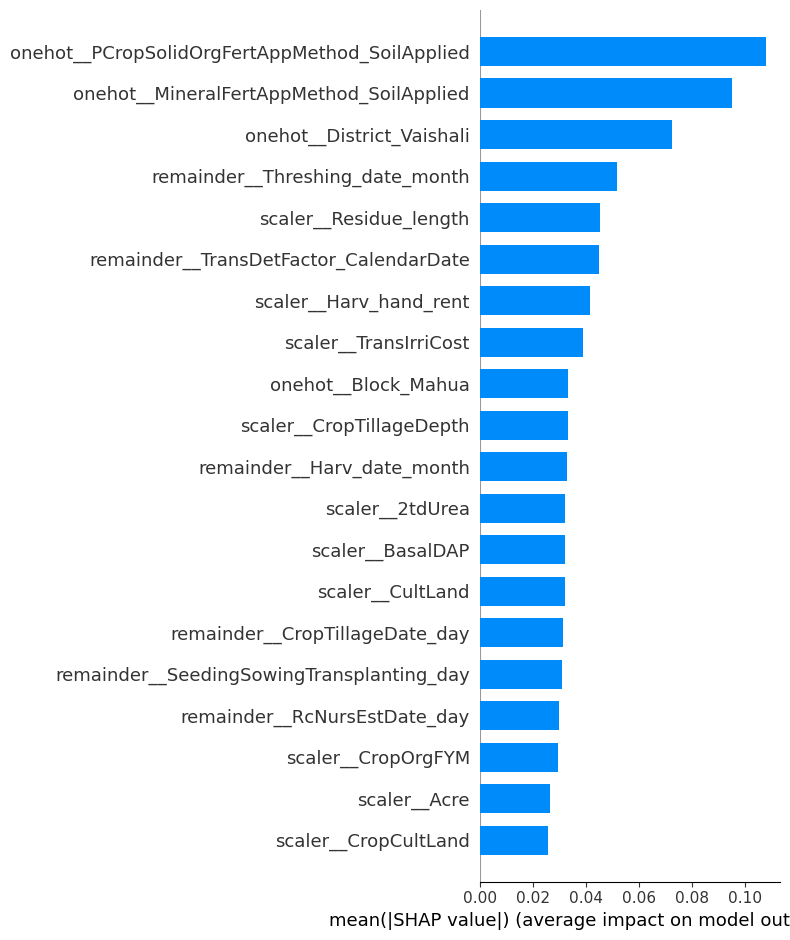

In [27]:
# Now you can use SHAP plots, e.g., summary plot
shap.summary_plot(shap_values, X_test_transformed_df, plot_type="bar")

#####
This SHAP summary plot shows the average impact of each feature on the model’s predictions across all instances in the test dataset. Here’s a breakdown of what it means:  

**Feature Importance**: The features are ranked from top to bottom based on their average SHAP values, which represent each feature's contribution to the model’s predictions. Higher mean SHAP values indicate that the feature has a larger impact on predictions.  

**Top Features**:
- onehot__PCropSolidOrgFertAppMethod_SoilApplied and onehot__MineralFertAppMethod_SoilApplied are the most influential features, meaning they play a significant role in determining the predicted outcome.
- onehot__District_Vaishali and scaler__Residue_length also have considerable impacts, indicating that the model relies heavily on these features for its predictions.  

**Interpretation of SHAP Values**:
- Each bar’s length represents the mean (average) absolute SHAP value for that feature across all samples, reflecting its average impact.
- Features with longer bars contribute more to the variability in predictions, meaning the model's predictions are sensitive to changes in these features.  

Here, the top feature is one-hot encoded PCropSolidOrgFertAppMethod - Method of applying organic fertilizer in your previous crop during land preparation (which was soil applied).

#####
**Summary Plot (Bee Swarm Plot)**  

- **Purpose**: Shows both feature importance and the distribution of SHAP values for each feature across all instances.  
- **Interpretation**: Each dot represents an instance. The position along the x-axis shows the impact on the model output, and the color shows whether the feature value is high (red) or low (blue).

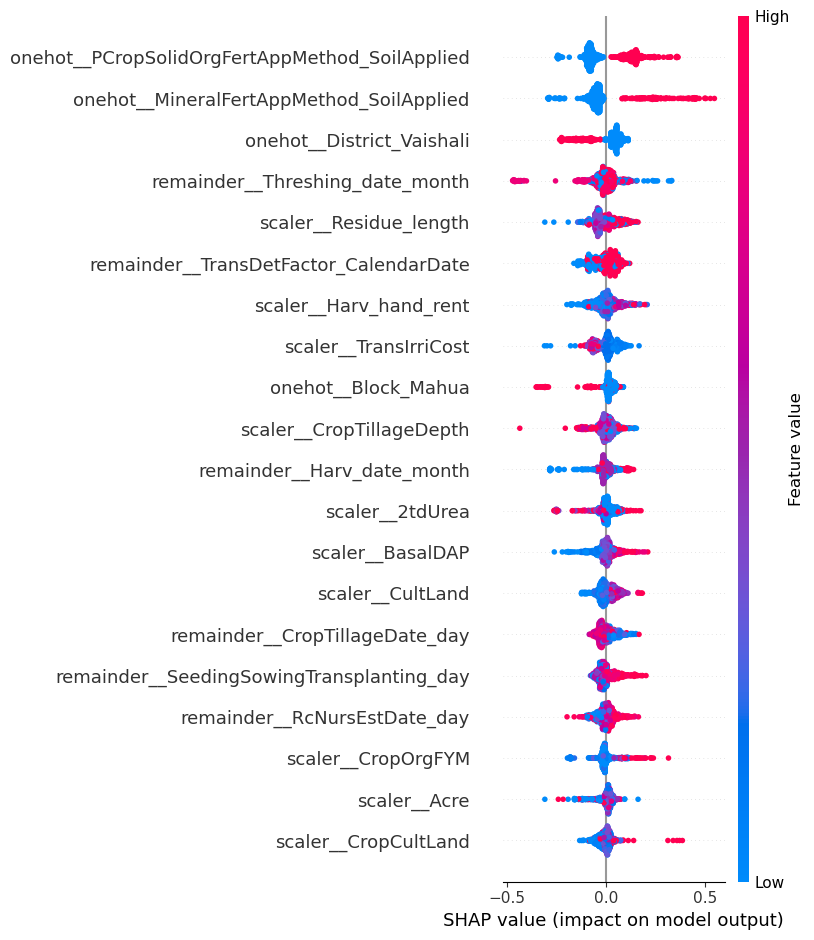

In [28]:
shap.summary_plot(shap_values, X_test_transformed_df)

#####
**Dependence Plot** 

- **Purpose**: Shows the relationship between a single feature and its SHAP values, indicating how different values of that feature affect the model's prediction. It can also show interactions between features.
- **Interpretation**: Helps understand how changing a specific feature’s value impacts the prediction. You can add a second feature to show interaction effects.

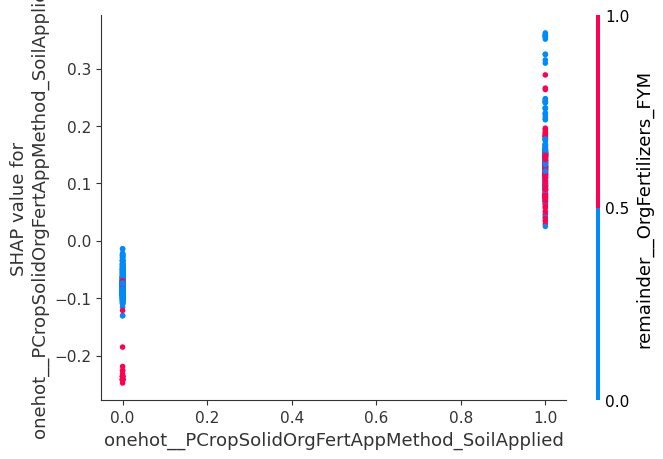

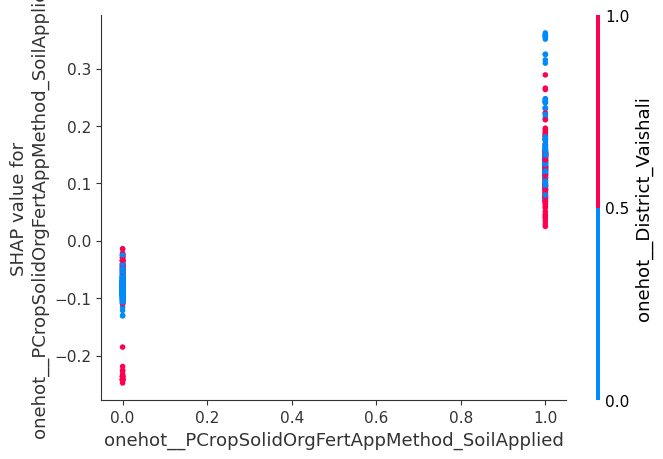

In [29]:
shap.dependence_plot('onehot__PCropSolidOrgFertAppMethod_SoilApplied', shap_values, X_test_transformed_df)
# For interactions with another feature
shap.dependence_plot('onehot__PCropSolidOrgFertAppMethod_SoilApplied', shap_values, X_test_transformed_df, interaction_index="onehot__District_Vaishali")

#####
**Force Plot**  

- **Purpose**: Visualizes the contribution of each feature to an individual prediction, showing how the SHAP values push the prediction from the baseline.
-**Interpretation**: Useful for understanding how specific features affect a single prediction, especially for local interpretability.

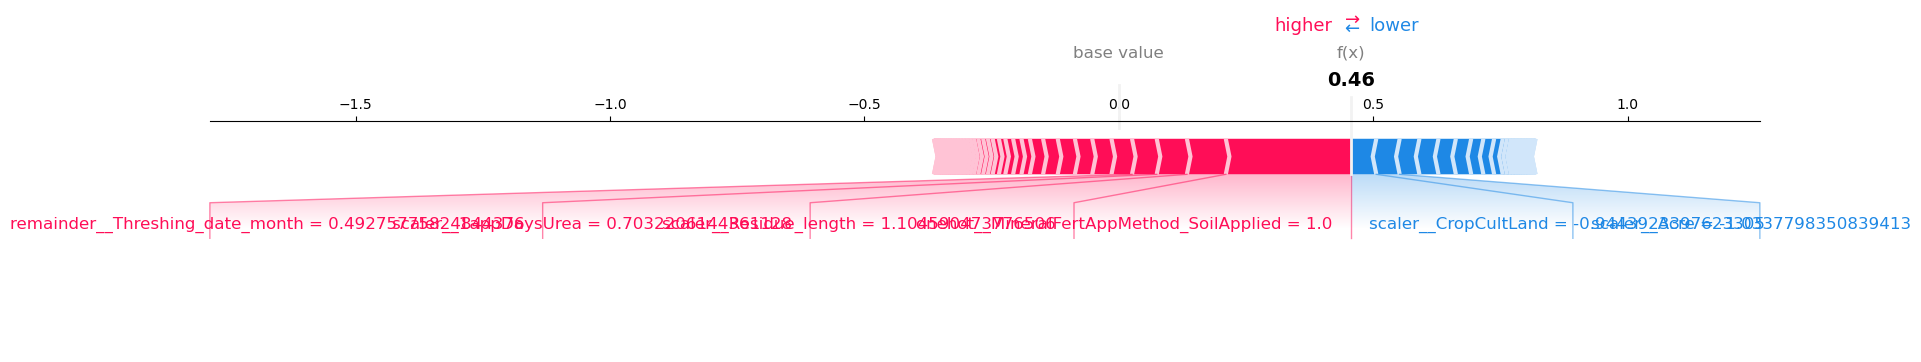

In [30]:
# For a single prediction (e.g., index 5)
shap.force_plot(explainer.expected_value, shap_values[5], X_test_transformed_df.iloc[5], matplotlib=True)

#####
**Waterfall Plot** 

- **Purpose**: Provides a detailed breakdown of the SHAP values for a single prediction, starting from the model's expected value and adding or subtracting contributions from each feature.
- **Interpretation**: Shows exactly how the model arrives at a specific prediction for an instance, making it useful for case-by-case analysis.

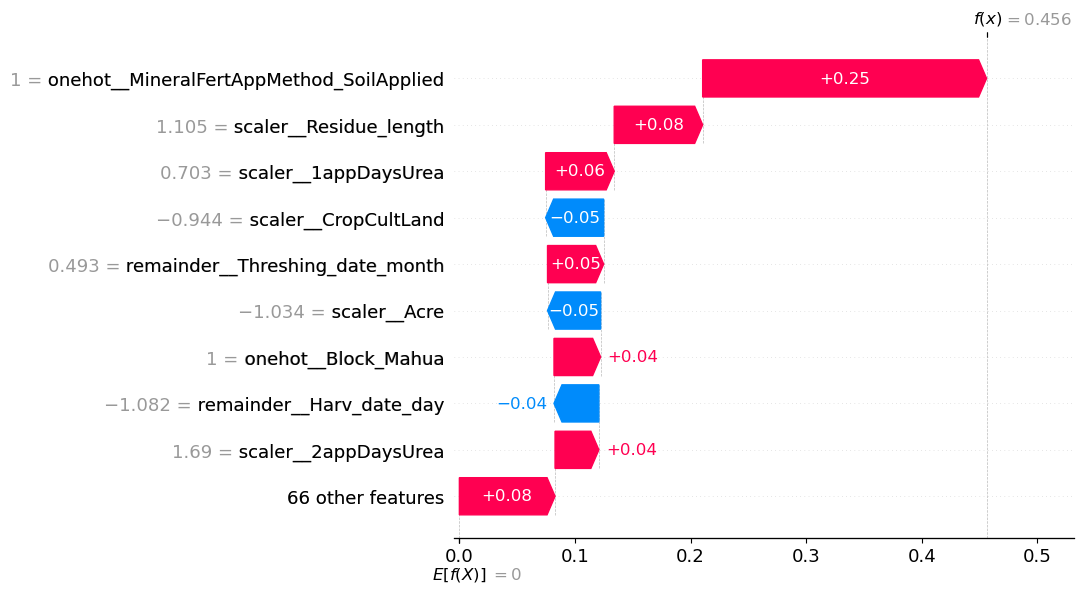

In [31]:
shap.waterfall_plot(shap.Explanation(values=shap_values[5], base_values=explainer.expected_value, data=X_test_transformed_df.iloc[5]))

####
Here, the baseline here is zero, representing the average starting point of the prediction. Each feature then either adds-to Or subtracts-from this baseline.
Positive contributions are shown in red, they increase yields. For example, 'Mineral Fertilizer Application by ’soil adds 0.23 on average, confirming its effectiveness. 
Negative contributions are shown in blue, they reduce yields.

### Recommendations

####
Based on these insights, we can recommend promoting effective fertilizer methods, especially mineral soil applications. We can also suggest targeted support for regions like Vaishali that face challenges. Finally, educating farmers on specific land preparation methods can also boost productivity. By sharing these findings, we can help farmers make better-informed decisions for sustainable farming.
